# **Assignment for BUSINESS ANALYST Intern @ JAR**
## **Aayush Kumar Gupta**
## **Email** : aayushgupta120305@gmail.com
## **Contact Info**: 8252802866


---




For an assignment, I am using **Python** and its **libraries** for efficient data **manipulation** to generate **visual insights** from the provided dataset.


---



### **Executive Summary**

This repost analyze and gave solution to increase sales and profitability. Optimizing regional performance, and market opportunities for JAR using Python - Driven data analysis. Using LSTM we can predict the upcoming sales report for 3 consective months.

**The Key finding and insights incldue:**

1. **Sales & Profitability:** Electronics contribute the highest total sales, while Clothing has the highest profit margin (8.03%). Furniture shows the lowest profitability (1.81%), requiring strategic adjustments.

2. **Target Achievement:** Sales targets for Furniture show a 1.15% average growth rate per quarter, but profitability remains low. Demand fluctuations highlight the need for seasonal pricing strategies.

3. **Regional Performance:** Madhya Pradesh and Maharashtra lead in sales and profit, while Punjab and Gujarat show low per-order profitability, requiring a pricing and discounting review.

4. **Future Opportunities for JAR:** Expansion into finance education, healthcare awareness, insurance partnerships, and lending platforms can enhance engagement and revenue.

Importing required detail for analysis and visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctypes import alignment
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

In [ ]:
lor = pd.read_csv('/content/List_of_Orders_55FFC79CF8.csv')
lor.head()


,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [ ]:
od = pd.read_csv("/content/Order_Details_19795F61CF.csv")
od.head(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [ ]:
st = pd.read_csv("/content/Sales_target_DD2E9B96A0.csv")
st.head(5)

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [ ]:
print(lor.shape)
print(od.shape)
print(st.shape)

(560, 5)
(1500, 6)
(36, 3)


## **Sales Analysis:**
### **Part 1: Sales and Profitability Analysis**

In [ ]:
df1 = lor.merge(od, on='Order ID')
df1

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
1496,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs
1498,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt


In [ ]:
empty = df1.isnull().sum()
empty

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0


### **Total Sales for each category across all orders**

In [ ]:
category_sales = df1.groupby("Category")["Amount"].sum().reset_index()
category_sales.head(5)

,Category,Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


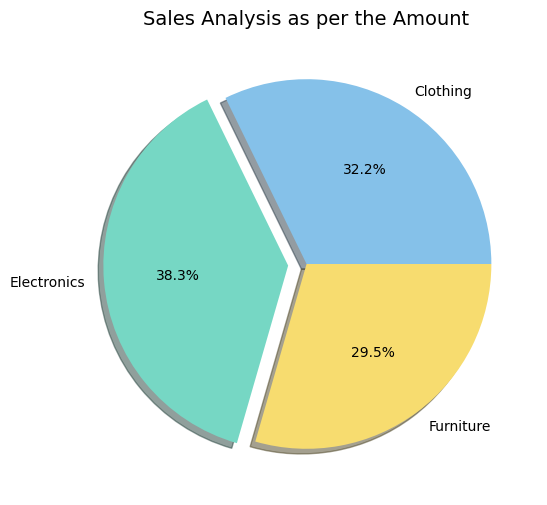

Electronics contributes the largest


In [ ]:
plt.figure(figsize=(7,6))
plt.pie(category_sales["Amount"], labels=category_sales["Category"], autopct='%1.1f%%',colors=["#85c1e9","#76d7c4","#f7dc6f"],shadow=True,explode=(0,0.1,0))
plt.title("Sales Analysis as per the Amount",fontsize=14)
plt.show()
print("Electronics contributes the largest")

### **For each category, The Average Profit per order is :**

In [ ]:
cp = df1.groupby("Category").agg({'Amount': 'sum', 'Profit': 'sum','Order ID' : 'nunique'}).reset_index()
cp

,Category,Amount,Profit,Order ID
0,Clothing,139054.0,11163.0,393
1,Electronics,165267.0,10494.0,204
2,Furniture,127181.0,2298.0,186


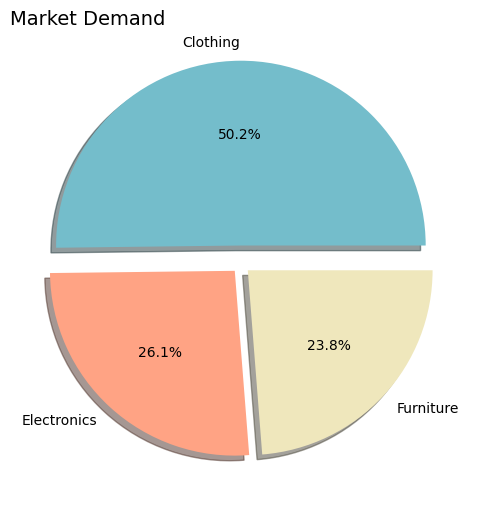

Clothing capture more than 50% of the total market


In [ ]:
plt.figure(figsize=(7,6))
plt.pie(cp["Order ID"], labels=cp["Category"], autopct='%1.1f%%',colors=["#74BDCB","#FFA384","#EFE7BC"],shadow=True,explode=(0.1,0.05,0.05))
plt.title("Market Demand",fontsize=14,loc="left")
plt.show()
print("Clothing capture more than 50% of the total market")

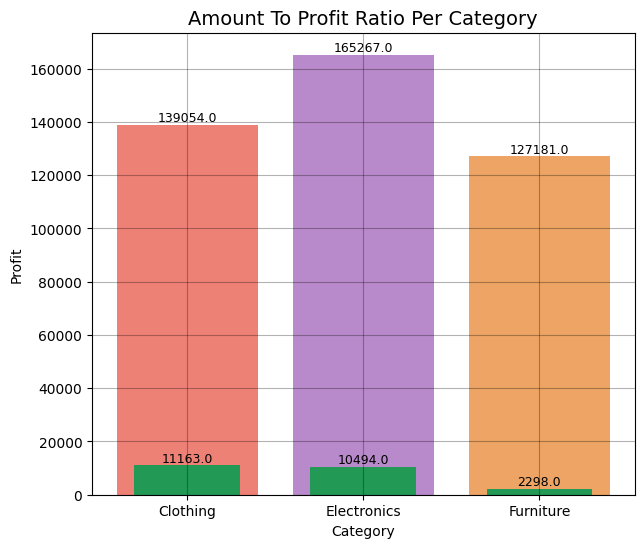

In [ ]:
plt.figure(figsize=(7,6))
plt.bar(cp["Category"],cp["Amount"],color=["#e74c3c","#9b59b6","#e67e22"],alpha = 0.7)
plt.bar(cp["Category"],cp["Profit"],color="#229954", width=0.6)
plt.xlabel("Category")
plt.ylabel("Profit")
plt.grid(True, alpha=0.3,color="black")
for i, value in enumerate(cp["Profit"]):
    plt.text(cp["Category"][i], value + 1, f"{str(value)}", ha='center', va='bottom', fontsize=9)
for i, value in enumerate(cp["Amount"]):
    plt.text(cp["Category"][i], value + 1, f"{str(value)}", ha='center', va='bottom', fontsize=9)
print()
plt.title("Amount To Profit Ratio Per Category",fontsize=14)
print()


In [ ]:
cp["Avg Profit Per Order"] = cp["Profit"] / cp["Order ID"]
cp["Profit Margine"] = (cp["Profit"] / cp["Amount"]) * 100
cp

,Category,Amount,Profit,Order ID,Avg Profit Per Order,Profit Margine
0,Clothing,139054.0,11163.0,393,28.404580,8.027817
1,Electronics,165267.0,10494.0,204,51.441176,6.349725
2,Furniture,127181.0,2298.0,186,12.354839,1.806874


* ### Hence The **Average Profit per order** is **Rs 28.404580** and **Profit Margine** is **8.027817 %** in **Clothing**

* ###  The **Average Profit per order** is **Rs 51.441176**  and **Profit Margine** is **6.349725 %** in **Electronics**

* ###  The **Average Profit per order** is **Rs 12.354839**  and **Profit Margine** is **1.806874 %** in **Furniture**

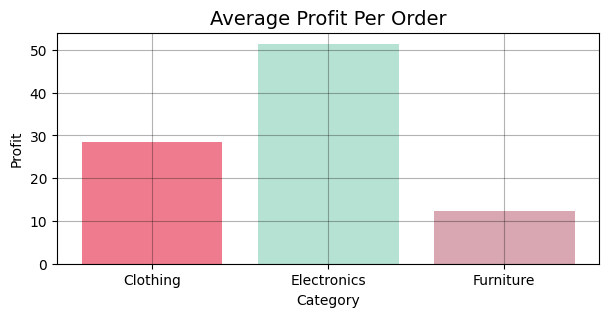

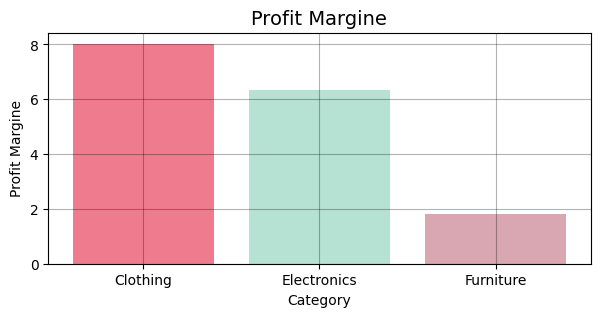

In [ ]:
plt.figure(figsize=(7,3))
plt.bar(cp["Category"],cp["Avg Profit Per Order"],color=["#ef7c8e","#B6E2D3","#D8A7B1"])
plt.grid(True, alpha=0.3,color="black")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Average Profit Per Order",fontsize=14)
plt.show()
plt.figure(figsize=(7,3))
plt.bar(cp["Category"],cp["Profit Margine"],color=["#ef7c8e","#B6E2D3","#D8A7B1"])
plt.grid(True, alpha=0.3,color="black")
plt.xlabel("Category")
plt.ylabel("Profit Margine")
plt.title("Profit Margine",fontsize=14)
plt.show()

### **Top Performing:**

*  **Clothing:** Highest *profit margin 8.03%*, indicating strong profitability relative to sales.
*   **Electronics:** Highest *average profit per order ₹51.44*, reflecting high per-order value.

### **Underperforming Category:**


*   **Furniture:** Lowest *profit margin 1.81%* and average profit per order ₹12.35, signaling lower profitability.


---




### **Reason for thier Performace Differences**

#### **Clothing :**

*   Consumer demand depends upon Social Media Sites and clothing pattern
*   Frequent Change in taste, leads to change in clothig style, Ultimately leads to frequent demand of cloths
* As Clots fit easily to consumers budget, people buy more and trash it more results in frequent purchasing of cloths

#### **Electronics :**

*   High-value items contribute to higher per-order profit.
*   due to competitive pricing it compress overall profit margins.
*   Day to Day depreciation of electronics good make people to lose interset in buing electronics.
* To survive in highly competitive environemnt, companies give huge offers and discount which lowers the Profit Margine

#### **Furniture :**

*  Furniture needs, storage, raw goods and huge amount of man labours which decreases the Profit Margine
* Due to furniture long life, an individual occasionally buy furnitures
which reduces the demand
* Comapnies give aggressive discounting to boost sales which reduce overall Profit Margine






---



---



##**Part 2:**
### **Target Achievement Analysis**

In [ ]:
print("First five data is : ")
print()
print(st.head(5))
print()
print("Shape is :", st.shape)

First five data is : 

  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4              Aug-18  Furniture  10900.0

Shape is : (36, 3)


In [ ]:
fur = st["Category"].unique()
fur

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
furniture = st[st["Category"] == "Furniture"]
print(furniture)
print()
furniture.count()

   Month of Order Date   Category   Target
0               Apr-18  Furniture  10400.0
1               May-18  Furniture  10500.0
2               Jun-18  Furniture  10600.0
3               Jul-18  Furniture  10800.0
4               Aug-18  Furniture  10900.0
5               Sep-18  Furniture  11000.0
6               Oct-18  Furniture  11100.0
7               Nov-18  Furniture  11300.0
8               Dec-18  Furniture  11400.0
9               Jan-19  Furniture  11500.0
10              Feb-19  Furniture  11600.0
11              Mar-19  Furniture  11800.0



,0
Month of Order Date,12
Category,12
Target,12


In [ ]:
furniture_target = st[st["Category"]=="Furniture"]

furniture_target["Target_%_Change"] = st["Target"].pct_change()*100
furniture_target

<ipython-input-66-3242cb4ab8a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_target["Target_%_Change"] = st["Target"].pct_change()*100 # Calculating Percentage Change


,Month of Order Date,Category,Target,Target_%_Change
0,2018-04-01,Furniture,10400.0,NaN
1,2018-05-01,Furniture,10500.0,0.961538
2,2018-06-01,Furniture,10600.0,0.952381
3,2018-07-01,Furniture,10800.0,1.886792
4,2018-08-01,Furniture,10900.0,0.925926
5,2018-09-01,Furniture,11000.0,0.917431
6,2018-10-01,Furniture,11100.0,0.909091
7,2018-11-01,Furniture,11300.0,1.801802
8,2018-12-01,Furniture,11400.0,0.884956
9,2019-01-01,Furniture,11500.0,0.877193


In [ ]:
furniture_target = st[st["Category"] == "Furniture"].copy()

furniture_target.reset_index(drop=True, inplace=True)

furniture_target["Target_%_Change"] = st["Target"].pct_change()*100
furniture_target[["Month of Order Date", "Target_%_Change"]]

,Month of Order Date,Target_%_Change
0,2018-04-01,NaN
1,2018-05-01,0.961538
2,2018-06-01,0.952381
3,2018-07-01,1.886792
4,2018-08-01,0.925926
5,2018-09-01,0.917431
6,2018-10-01,0.909091
7,2018-11-01,1.801802
8,2018-12-01,0.884956
9,2019-01-01,0.877193


In [ ]:
print(furniture_target["Target_%_Change"].mean())

1.15552850721119


### The Percentage change in the target sales for the **Furniture** category **Month-Over-Month** is as follow:

### It is **Visualize** by the **line Chart**

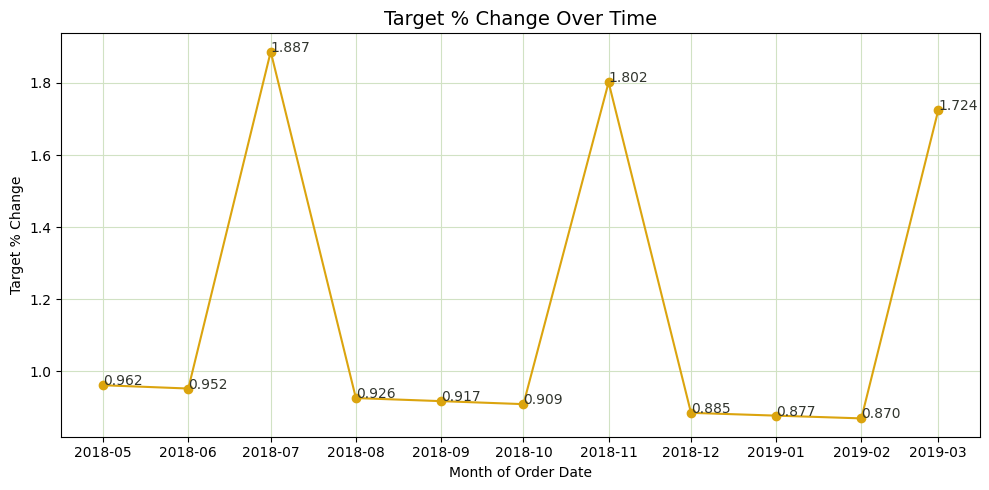

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(furniture_target["Month of Order Date"], furniture_target["Target_%_Change"], marker='o', linestyle='-', color="#DBA40E")
plt.title("Target % Change Over Time", fontsize=14)
plt.xlabel("Month of Order Date")
plt.ylabel("Target % Change")
plt.grid(True,color="#D1E2C4")
plt.tight_layout()
for i, value in enumerate(furniture_target["Target_%_Change"]):
    plt.text(furniture_target["Month of Order Date"][i], value,f"{value:.3f}", fontsize=10, color="#31352E")
plt.show()

### According to the graph we can see the significant fluctuation in the month of :

*   **July** with **1.886792%** jump
*   **November** with **1.801802%** jump
*   **March** with **1.724138%** jump.


In [ ]:
st["Month of Order Date"] = pd.to_datetime(st["Month of Order Date"], format="%b-%y")
furniture_target = st[st["Category"] == "Furniture"].copy()
furniture_target.set_index("Month of Order Date", inplace=True)
furniture_target

,Category,Target
Month of Order Date,,
2018-04-01,Furniture,10400.0
2018-05-01,Furniture,10500.0
2018-06-01,Furniture,10600.0
2018-07-01,Furniture,10800.0
2018-08-01,Furniture,10900.0
2018-09-01,Furniture,11000.0
2018-10-01,Furniture,11100.0
2018-11-01,Furniture,11300.0
2018-12-01,Furniture,11400.0


In [ ]:
model_arima = ARIMA(furniture_target["Target"], order=(1,1,1))
fit_arima = model_arima.fit()
steps = 3
forecast_arima = fit_arima.forecast(steps)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
last_date = furniture_target.index[-1]
forecast_dates = [last_date + DateOffset(months=i) for i in range(1,steps + 1)]
forecast_df = pd.DataFrame({'Forecast': forecast_arima}, index=forecast_dates)
forecast_df

,Forecast
2019-04-01,11926.370486
2019-05-01,12052.740599
2019-06-01,12179.110341


### **The given furniture is expected to grow as:**
* **2019-04-01 ->    Rs 11926.370486**
* **2019-05-01 -> 	 Rs 12052.740599**
* **2019-06-01 -> 	 Rs 12179.110341**

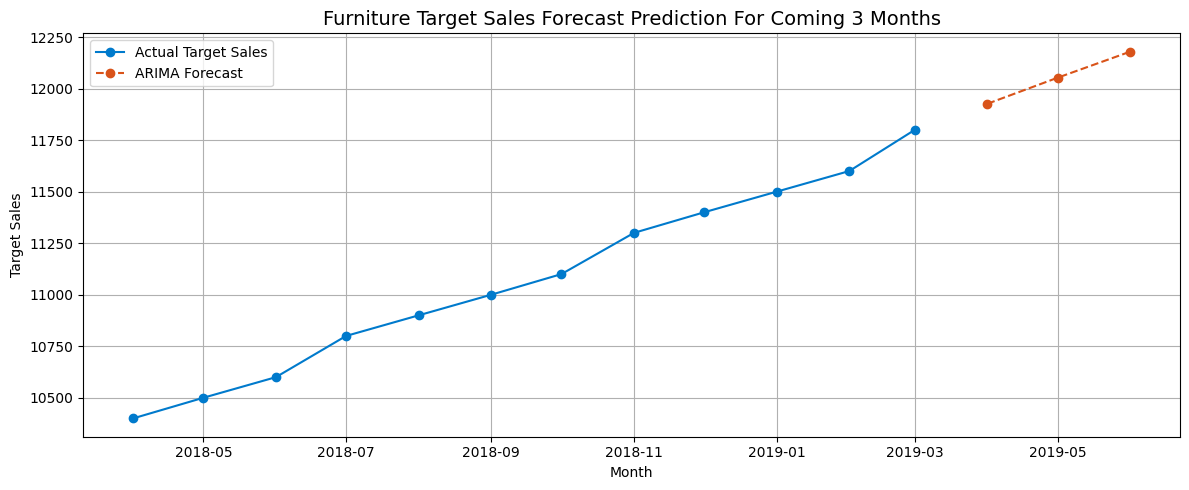

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(furniture_target.index, furniture_target["Target"], label="Actual Target Sales", marker='o', color="#007ACC")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="ARIMA Forecast", marker='o', linestyle='--', color="#D95319")
plt.title("Furniture Target Sales Forecast Prediction For Coming 3 Months", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Target Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **To Achieve the above target expectation for coming 3 months we can implement:**


*   Increase the **Furniture price by 1.15552850721119%** atleast **once in 3 months**

*   **Economic conditions**, **festival and consumer behaviours** will deeply impact to achieve target. One need to **plan** in **before** any festival, Government regulation to achieve target   

* Instead of fixed target band, we should regularly compare and check and then plan to **revise targets accordingly**.

* TO **focus** more on **Target audience** and **invest** more in cities or in **region with growing demand**

* To use **Machine Learning** techniques to **predict upcoming results** based on past performace and to plan accordingly

* To use **digital advertisiments** to attract customers, and to give regular **discouts upto certain level**, to increase **customers attractions**

###**Part 3**
### **Regional Performace Insights**



In [ ]:
lor.head(5)

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


### **Top 5 Highest order count** is:

In [ ]:
top_states = lor["State"].value_counts().index.tolist()
top_states
orderid = lor.groupby("State")["Order ID"].count().reset_index().sort_values(by=['Order ID'], ascending=False)
orderid.head(5)

,State,Order ID
10,Madhya Pradesh,101
11,Maharashtra,90
14,Rajasthan,32
4,Gujarat,27
13,Punjab,25


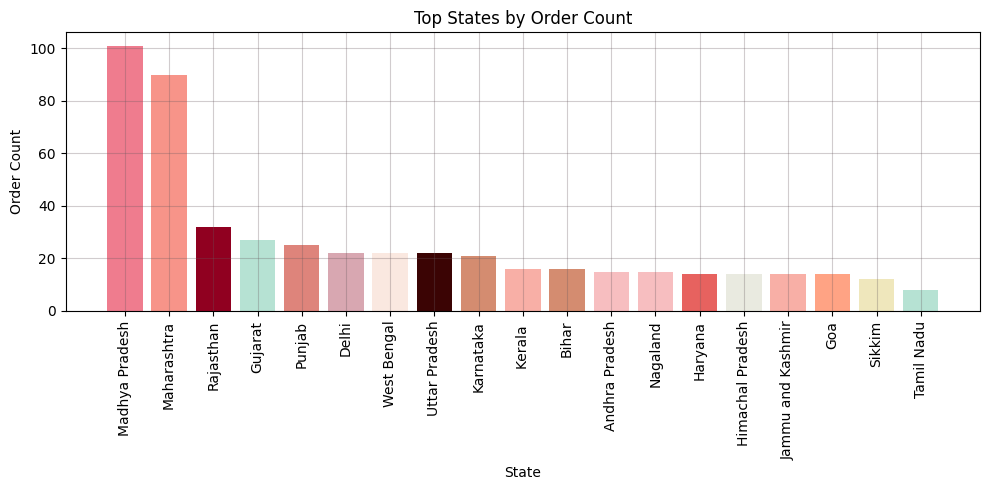

In [ ]:
plt.figure(figsize=(10, 5))
color = ["#EF7C8E","#F79489","#900020","#B6E2D3","#DE847B","#D8A7B1","#FAE8E0","#3B0404","#D48C70","#F8AFA6","#D48C70","#F7BEC0","#F7BEC0","#E7625F","#E9EAE0","#F8AFA6","#FFA384","#EFE7BC","#B6E2D3"]
plt.bar(orderid["State"], orderid["Order ID"],color=color)
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Order Count")
plt.title("Top States by Order Count")
plt.tight_layout()
plt.grid(True, alpha=0.3,color="#67595E")
plt.show()

In [ ]:
top_states_data = lor[lor["State"].isin(top_states)]

top_states_data = pd.merge(top_states_data, df1[['Order ID', 'Amount', 'Profit']], on='Order ID', how='left')

top_states_data.columns


Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City', 'Amount',
       'Profit'],
      dtype='object')

In [ ]:
state_sales_profit = top_states_data.groupby("State").agg(
    Total_Sales=("Amount", "sum"),
    Total_Profit=("Profit", "sum"),
    Order_Count=("Order ID", "nunique")
).reset_index()

state_sales_profit["Avg_Profit_Per_Order"] = state_sales_profit["Total_Profit"] / state_sales_profit["Order_Count"]

state_sales_profit = state_sales_profit.sort_values(by="Order_Count", ascending=False)
state_sales_profit

,State,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order
10,Madhya Pradesh,105140.0,5551.0,101,54.960396
11,Maharashtra,95348.0,6176.0,90,68.622222
14,Rajasthan,21149.0,1257.0,32,39.281250
4,Gujarat,21058.0,465.0,27,17.222222
13,Punjab,16786.0,-609.0,25,-24.360000
2,Delhi,22531.0,2987.0,22,135.772727
18,West Bengal,14086.0,2500.0,22,113.636364
17,Uttar Pradesh,22359.0,3237.0,22,147.136364
8,Karnataka,15058.0,645.0,21,30.714286
9,Kerala,13459.0,1871.0,16,116.937500


###Therefore the **Top 5 states** with the **Highest Order Count** with **Total Sales** and **Average profit** is as Follows:

In [ ]:
state_sales_profit.head(5)

,State,Total_Sales,Total_Profit,Order_Count,Avg_Profit_Per_Order
10,Madhya Pradesh,105140.0,5551.0,101,54.960396
11,Maharashtra,95348.0,6176.0,90,68.622222
14,Rajasthan,21149.0,1257.0,32,39.281250
4,Gujarat,21058.0,465.0,27,17.222222
13,Punjab,16786.0,-609.0,25,-24.360000


In [ ]:
state_sales_profit.shape

(19, 5)

<ipython-input-127-73a035e7ee5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[["Total_Sales","Total_Profit","Order_Count","Avg_Profit_Per_Order"]] = y[["Total_Sales","Total_Profit","Order_Count","Avg_Profit_Per_Order"]].divide(100)


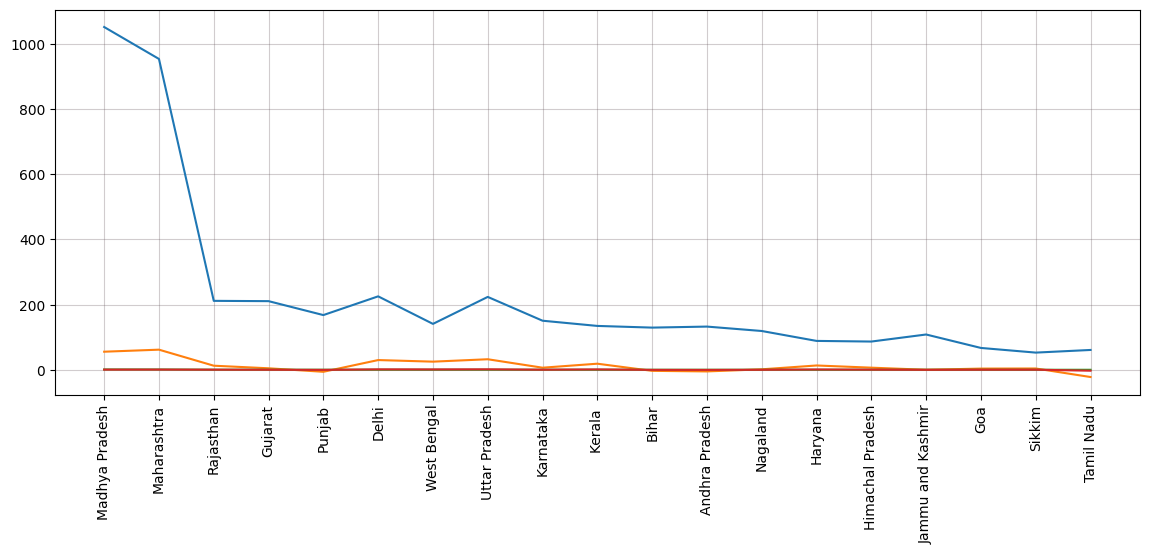

In [ ]:
plt.figure(figsize=(14, 5))
y = state_sales_profit[["Total_Sales","Total_Profit","Order_Count","Avg_Profit_Per_Order"]]
y[["Total_Sales","Total_Profit","Order_Count","Avg_Profit_Per_Order"]] = y[["Total_Sales","Total_Profit","Order_Count","Avg_Profit_Per_Order"]].divide(100)
x = state_sales_profit["State"]
plt.tight_layout()
plt.grid(True, alpha=0.3,color="#67595E")
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()


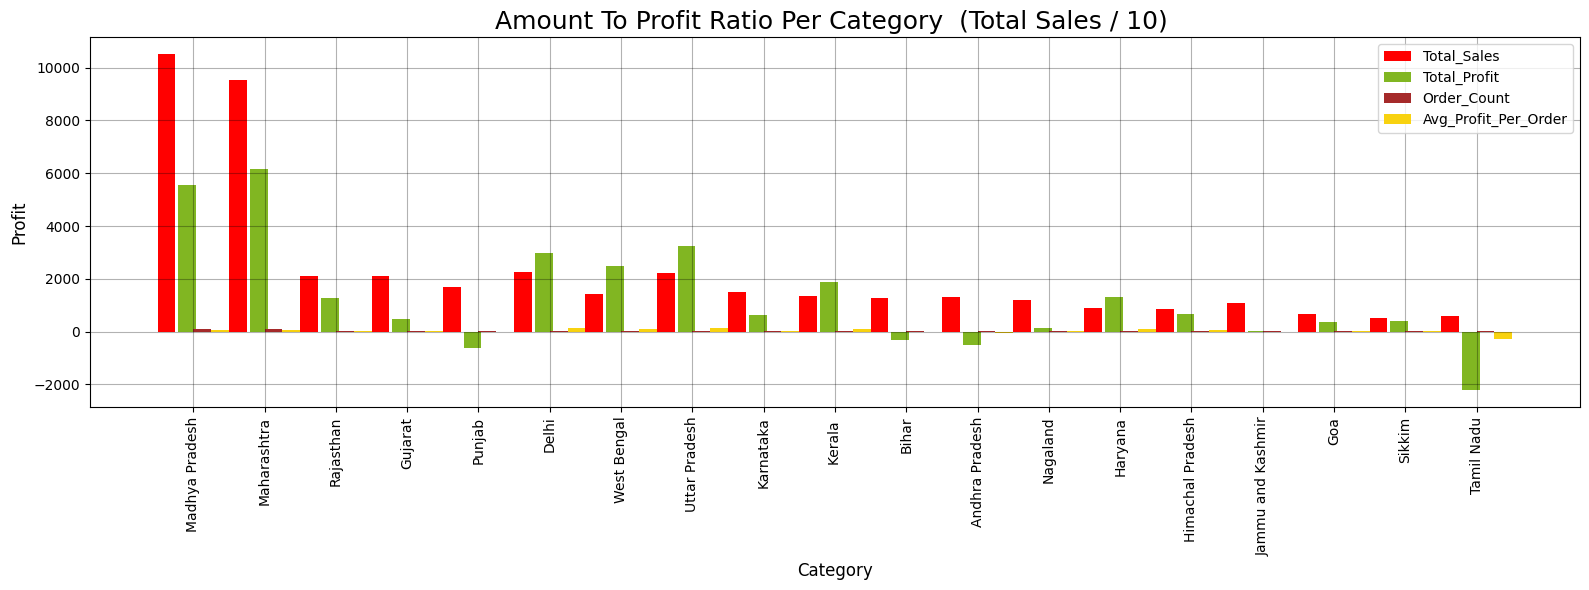

In [ ]:
plt.figure(figsize=(16,6))
c = ["#EF7C8E","#F79489","#900020","#B6E2D3","#DE847B","#D8A7B1","#FAE8E0","#3B0404","#D48C70","#F8AFA6","#D48C70","#F7BEC0","#F7BEC0","#E7625F","#E9EAE0","#F8AFA6","#FFA384","#EFE7BC","#B6E2D3"]
width = 0.25
x_axis = np.arange(len(state_sales_profit["State"]))

plt.bar(x_axis - width*1.5, state_sales_profit["Total_Sales"]/10, width=width, label='Total_Sales', color="red")
plt.bar(x_axis - width/3, state_sales_profit["Total_Profit"], width=width, label='Total_Profit', color="#81B622")
plt.bar(x_axis + width/2, state_sales_profit["Order_Count"], width=width, label='Order_Count', color="brown")
plt.bar(x_axis + width*1.5, state_sales_profit["Avg_Profit_Per_Order"], width=width, label='Avg_Profit_Per_Order', color="#F8D210")

plt.xlabel("Category",fontsize=12)
plt.ylabel("Profit",fontsize=12)
plt.xticks(x_axis, state_sales_profit["State"], rotation=90)
plt.grid(True, alpha=0.3,color="black")
plt.legend()
plt.title("Amount To Profit Ratio Per Category  (Total Sales / 10) ",fontsize=18)
print()
plt.tight_layout()
plt.show()

###**Regional Disparities In Sales and Profitability**

**Delhi**

* Total Sales: ₹22,531
* Total Profit: ₹2,987
* Unique Order Count: 74
* Avg Profit per Order: ₹40.36
* Observation: Delhi total sales are lower than top 5 states, but still shows Highest Average Profit per order, Hence each order in Delhi is more profitable

* Area of Improvements :
Maintain focus on high-value products and consider expanding premium offerings further.

**Gujarat**

* Total Sales: ₹21,058
* Total Profit: ₹465
* Unique Order Count: 87
* Avg Profit per Order: ₹5.34
* Observation: Despite having higher order count, Gujarat generates ery low profit in total and per order. This suggest low margine sales

* Area of Improvements:
* Reevaluate pricing strategy: Consider reducing aggressive discounting.
* Product mix optimization: Focus on promoting higher-margin products rather than volume alone.
 * Cost control: Review logistics or operational expenses that might be eroding profit margins.

**Madhya Pradesh**

* Total Sales: ₹1,05,140
* Total Profit: ₹5,551
* Unique Order Count: 101
* Avg Profit per Order: Approximately ₹16.33
* Observation: It drives highest total sales, but the average profit per oirder is moderate.
 With high volume, even small margin improvements could significantly increase overall profitability.

* Area of Improverment:
* Improve product mix: Identify if there is a high proportion of low-margin sales and work to shift the focus toward more profitable items.
* Operational efficiency: Streamline order processing or reduce associated costs to improve margins.

**Maharashtra:**

* Total Sales: ₹95,348
* Total Profit: ₹6,176
* Unique Orders: 290
* Average Profit per Order: ~₹21.30
* Observation:
This shows best balance between Total_Sales, Total_profit, and order count
Suggestion:
* Area of improverments:
Invest in marketing to further capitalize on this region's strong performance and consider expansion into adjacent areas.


**Rajasthan:**

* Total Sales: ₹21,149
* Total Profit: ₹1,257
* Unique Orders: 74
* Average Profit per Order: ~₹16.99
* Observation:
Rajasthan shows comparatively good level of Total Sales, and Total profit and Order count

* Area of improvements:
Target Audience: Increase targeted marketing efforts to boost sales volume.
Local customization: To understand the local need and demand and customize it accordingly to maximize expansion

---

* **Customize Regional Strategies:** For markets like Gujarat, focus on margin improvement through re-examination of discounting policies and driving high-margin products.
Employ Madhya Pradesh high volume sales as the standard in continuous optimization of the product mix to reduce the cost per order.

* **Improve Data-Driven Decision Making:**
Leverage ongoing monitoring in local performance and dynamically realign strategies based on real-time data.

* **Targeted marketing** :
Efforts and concentrated campaigns to respond to specific regional issues. Operational Improvements:

* **Increase productivity levels** :
In the low average profit per order category to enhance overall profitability levels.

* **Customer Feedback & Engagement** :
Gather customer comments in underperforming regions to be aware of local tastes and difficulties and make corresponding adjustments.

---
---
---
---

## **Question 2**
### **Features and User Experience Of The Jar App**
### **Intuitive Interface & Clean Design**

* **User Interface and User Design :**

The app is simple and modern with minimalist icons and easy navigation, and it is simple for newcomers to comprehend and begin investing.

* **Low Entry Barrier:**

Invest as low as ₹10, Through enabling small investments, the app makes digital gold accessible to the masses, introducing the first-time investors to it and dispelling the fear factor.

* **Automated Savings and Investment System :**

Recurring investments/savings automation enables users to be consistent without having to constantly intervene each month, which ensures disciplined investment culture.

* **Real-Time Portfolio Surveillance & Dashboard :**

A readily comprehensible, insightful dashboard that displays current investment values, performance, and historical trends enables informed decision-making.


* **Robust Security & Trust-Building Features :**

Security features such as two-factor authentication and data encryption enhance users' trust in managing digital assets, a key requirement for financial apps.

---
---

### **Areas for Improvement**

**Enhanced User Training & Onboarding**

* **Improvement Suggestion :**

An Interactive video can be provided during signup, this will enhance the
user trust about gold investment and will also evaluate risk.  

Most of the new investors may be unaware of digital gold, Improved study and frequnts video updates will make user to get more benefits from the study

App Speed & Performance Enhancement can be improved

* **Improvement Recommendation :**

Imporved Backend process and data fetching system to reduce loading times will enhance the overall user experience.

According to Human Psychology, using of White elements and Light color shade will make user trust more refined.

* **Improved Customer Support Integration :**


Develop a robust customer support framework, which may involve chatbot trained, 24/7 customer support, and in-app troubleshooting video tutorials.

**Reason:** Prompt and effective support instills confidence and makes users feel supported, which is critical in financial apps.

* **Customization & Personalization Options :**

Improvement Suggestion: Allow users to customize notifications, set personalized investment goals.

**Reason :**
A customized experience can be used to increase engagement by addressing personal investment behaviors and tendencies, rendering the app more appropriate for different kinds of users. Integration with Other Financial Tools

**Improvement Proposal :**

Facilitate integration with personal budget or finance apps, or provide APIs for syncing bank accounts so that one can get an end-to-end view of his/her financial well-being.

**Reason :** Integration with other financial services would enable users to control their financial planning more holistically as a package, making the app more useful and sticky.

## **Question 3**
###**Product Exploration:**

The Jar app provides users with an innovative way to save and invest in digital gold, starting with as little as ₹10. It automates savings and investments, making financial planning seamless and accessible. As the first Made-in-India app to pioneer such a solution, Jar has successfully created a niche in automated savings and investment.

Some new business opportunities Jar could venture into is:


*   Health care Awarness:
*   Course in Finance and Trading :
*   Finance and Trading book selling:
*   Integration with Financial Planning Tools:
*   Finance Consultation :
*   Collaboration with Insurence Companies:
*   Integration with Digital Payment and Lending Platforms:




1.   **Health care Awarness:**
      These days, user love to watch heath related video and tips. Jar can start a minimal payment about the user health care, like notification, online consultation with doctor with collaboration with Meddibuddy, TATA1mg etc for discounted medicine.

2.   **Course in Finance and Trading :**
      Jar can sell course on Finance and Trading on their own application, where jar can aware their user for different tips and technique for invetment and trading in stock market.

3.   **Finance and Trading book selling:**

      Stocks and mutual funds paid invetment and tip and technique can make people aware about their earning potential. Jar can diversify its investment offerings beyond digital gold.

4.    **Integration with Financial Planning Tools:**
      Build features for retirement planning, goal-based savings, and expense tracking, offering users an end-to-end financial management solution.

5.    **Finance Consultation :**

      Needed user can have a one to one interaction with financial experts on paid serive theme for their long term or shortterm goals

6.    **Collaboration with Insurence Companies:**

      Jar can seemlessly collaborate with insurence companies for thier easy insurence on gold and silver assests

7.    **Integration with Digital Payment and Lending Platforms:**

      Incorporate payment services for bill payments, peer-to-peer transactions, or even micro-loans, making Jar a one-stop solution for everyday financial transactions.

**Healthcare Awareness & Minimal Payment Services:**

* Implementing Automation:
Implement automated push notifications to provide customized wellness tips and reminders to ensure users receive timely helpful advice.
Implement auto-scheduling of video consultations. Make sure that it integrates smoothly with partners like Meddibuddy or TATA1mg.

* User-Friendly Design & Reliability
A clean, easy-to-use interface can facilitate scheduling consultations and accessing discounted medication more conveniently.
Jar has built trust that can translate to healthcare, making users know the service is affordable and accessible.

**Courses in Finance and Trading:**

Using Automation:

Utilize automated software to produce webinars, issue reminders for courses, and manage enrollments.

* Ergonomic Design & Dependability:
An integrated learning platform with multiple tools, is user-friendly, and provides real-time feedback can enhance the learning process.
Jar's finance management credibility has the ability to motivate users into investing in practical investment and trading courses.

**Finance and Trading Book Selling:**

Applying Automation:

Tailor marketing campaigns and book suggestions according to user investment profiles and browsing history.

Simple-to-Use Design & Credibility:
An in-app integrated marketplace, making easy browsing and purchasing possible, takes advantage of Jar's existing trust.
Professional reviews and carefully selected content enlighten users to the value of such books, and their own financial acumen is enhanced.


**Integration with Financial Planning Tools:**

* Utilizing Automation:
Use automated portfolio rebalancing, reminders to save, and tracking of expenses based on real-time data.

* Easy-to-Use Design & Credibility:

A single dashboard that consolidates different financial metrics (expense tracking, retirement planning, and goal savings) makes managing money easier.
Jar's trust factor ensures users feel secure while using planning tools, and that makes them better financial decision-makers.

**Money Help Services:**

* Implementing Automation:
Use chatbots to schedule appointments, remind patients through follow-up, and perform initial screening.

* User-Friendly Design & Credibility:
A straightforward appointment system for one-on-one meetings with financial experts can help make expert guidance more accessible.
Customers will be assured of accessing these services because they are supported by Jar's proven capability to handle money.

**Cooperation with Insurance Institutions:**

* Deploying Automation:

Automate policy renewals, update claim status, and suggest insurance to a person based on the user's assets.

* Simple-to-Use Design & Reliability:

An effective connection with insurance companies for silver and gold investments, explained in a clear and transparent way, enhances the main digital gold service. Jar's credibility will allow people to trust these collaborative insurance products, perhaps leading more people to utilize them.

**Collaboration with Online Loan and Payment Platforms Using Automation:**

Implement automated payment processing and rapid loan approval to enable speedy transactions.

* Easy-to-Use Design & Reliability:

A single, unified platform that enables bill payments, P2P, and micro-loans adds more functionality to the app. Jar's history of secure online transactions can be taken to these financial services, thereby enabling users to have confidence in the platform with their day-to-day financial requirements.

## **SWOT Analysis**

### Strengths


*  Strong demand in Electronics and Clothing categories.
*   Madhya Pradesh & Maharashtra drive high sales volume.

*   Use of Python, ARIMA forecasting, and data visualization for insights.



### Weaknesses


* Low profit margins in the Furniture category.
* Certain regions (Punjab & Gujarat) show weak profitability.
* Discount-driven sales strategy reducing overall margins.

### Opportunities

* Expansion into finance courses, trading books, and lending services.

* Personalization and AI-driven financial planning tools.

*  Leveraging targeted regional marketing for demand-based growth.

### Threats

* Highly competitive digital investment and savings market.

* Fluctuating consumer behavior and economic downturns.

* Regulatory risks in digital finance and investment sectors.

---

### **Closing Statement**
This assignment showcases data-driven **decision-making**, **business analysis**, and **strategic thinking** through **Python**-based data **visualization**, **forecasting**, and **profitability analysis**. By integrating **financial analysis** with **market insights**, I have demonstrated my ability to identify trends, **optimize business strategies**, and **suggest impactful recommendations**. My expertise in **data analytics**, **sales forecasting**, and **regional performance optimization** aligns well with the **Business Analyst role at JAR**, making me a **strong candidate for this opportunity.**